# Cmpe 548 Monte Carlo Methods Assignment 2

**Alper Ahmetoğlu 2012400147**

### 1. Importance Sampling (unfinished)

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [299]:
N = 10000
lamda = 5
beta = 1 / lamda
r = np.random.exponential(beta, N)
r2 = np.random.rand(N)

def phi(x):
    if x > 1:
        return 0
    else:
        y = (1 - np.sqrt(x)) ** 2
        return y
    
def q(x):
    return lamda * np.exp(- lamda * x)

a = list(map(lambda x: phi(x), r))
b = q(r)

w = (a / b)
mc_estimate = 4 * np.mean(w)
print(armc_estimate)

0.665484793996


### 2. Markov Chains

In [78]:
# Transition matrix

A = [[0.25, 0,    0,    0,    0,    0.25],
     [0.25, 0.25, 0.25, 0.25, 0.25, 0.25],
     [0.25, 0.25, 0,    0.5,  0.25, 0.25],
     [0,    0,    0.5,  0,    0,    0   ],
     [0,    0.25, 0,    0,    0.25, 0   ],
     [0.25, 0.25, 0.25, 0.25, 0.25, 0.25]]

In [135]:
# Eigenvector corresponding to lambda_1 = 1
v_1 = np.transpose(np.linalg.eig(A)[1])[0]
v_1 = v_1 / sum(v_1)
print('pi', v_1)
print()
print('T pi(x)')
print(np.matmul(np.diag(v_1),A))

pi [ 0.08333333  0.25        0.22222222  0.11111111  0.08333333  0.25      ]

T pi(x)
[[ 0.02083333  0.          0.          0.          0.          0.02083333]
 [ 0.0625      0.0625      0.0625      0.0625      0.0625      0.0625    ]
 [ 0.05555556  0.05555556  0.          0.11111111  0.05555556  0.05555556]
 [ 0.          0.          0.05555556  0.          0.          0.        ]
 [ 0.          0.02083333  0.          0.          0.02083333  0.        ]
 [ 0.0625      0.0625      0.0625      0.0625      0.0625      0.0625    ]]


***Detailed Balance Condition***

This process does not satify *detailed balance conditon* since $T(x \mid x')\, \pi (x') = T(x' \mid x)\, \pi (x)$ condition does not hold. Some state transitions have one direction. For example there is a state transition from state 1 to state 3 but the opposite does not exist.

In [110]:
e = 10**-8

# Initial configuration

Tmix = [1,0,0,0,0,0]
count = 0

while sum(np.absolute(v_1 - Tmix)) > e:
    Tmix = np.matmul(A,Tmix)
    count += 1
print(Tmix, 'at ', count)

[ 0.08333333  0.25        0.22222223  0.11111111  0.08333333  0.25      ] at  25


array([ 0.08333333,  0.25      ,  0.22222222,  0.11111111,  0.08333333,
        0.25      ])

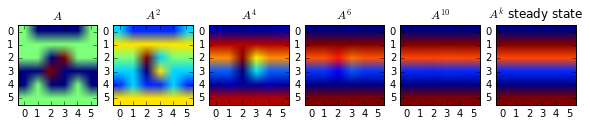

In [108]:
A_2 = np.linalg.matrix_power(A,2)         # A_2  = A^2
A_4 = np.linalg.matrix_power(A,4)         # A_4  = A^4
A_6 = np.linalg.matrix_power(A,6)         # A_6  = A^6
A_10 = np.linalg.matrix_power(A,10)        # A_10 = A^10
A_steady = np.linalg.matrix_power(A,count)


fig = plt.figure(figsize=(10,5))

a=fig.add_subplot(1,6,1)
plt.title(r'$A$')
plt.imshow(A)

a=fig.add_subplot(1,6,2)
plt.title(r'$A^2$')
plt.imshow(A_2);

a=fig.add_subplot(1,6,3)
plt.title(r'$A^4$')
plt.imshow(A_4);

a=fig.add_subplot(1,6,4)
plt.title(r'$A^6$')
plt.imshow(A_6);

a=fig.add_subplot(1,6,5)
plt.title(r'$A^{10}$')
plt.imshow(A_10);

a=fig.add_subplot(1,6,6)
plt.title(r'$A^{k}$ steady state')
plt.imshow(A_steady);

np.matmul(A_steady, X_0)

As we have seen above, even after 10 iterations transition kernel $K$ reaches the stationary distribution.

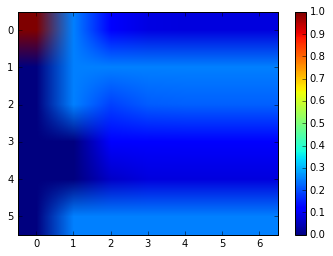

In [126]:
X_0 = [1,0,0,0,0,0]

pi_1 = np.matmul(A, X_0)
pi_2 = np.matmul(A_2, X_0)
pi_4 = np.matmul(A_4, X_0)
pi_6 = np.matmul(A_6, X_0)
pi_10 = np.matmul(A_10, X_0)
pi_steady = np.matmul(A_steady, X_0)

pi_over_t = [np.array(X_0), pi_1, pi_2, pi_4, pi_6, pi_10, pi_steady]

plt.imshow(np.transpose(pi_over_t));
plt.colorbar();

### Simulating Chain

In [235]:
size = 1000
M = count           ## Time T_mix
state = 0
B = np.transpose(A) ## for convenience (B[0] == die's top face is 1)
p = [0,0,0,0,0,0]
hstgrm = []

for y in range(size):
    h = []
    for i in range(M):
        temp_cdf_value = 0
        rn = np.random.rand(1)
        for j in range(6):
            temp_cdf_value += B[state][j]
            if temp_cdf_value > rn:
                state = j
                h.append(state);
                break
    hstgrm.append(h)
    p[state] += 1

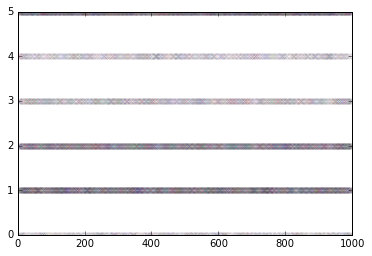

In [240]:
plt.plot(hstgrm,'x', alpha=0.03);

### Simulating a Single Chain

In [233]:
size = 1000
M = count            ## Time T_mix
state = 0
p_2 = [0,0,0,0,0,0]
qwe_2 = []

for i in range(size+count):
    temp_cdf_value = 0
    rn = np.random.rand(1)
    for j in range(6):
        temp_cdf_value += B[state][j]
        if temp_cdf_value > rn:
            state = j
            if i > M:
                p_2[state] += 1
                qwe_2.append(state)
            break

[79, 244, 221, 104, 76, 275]

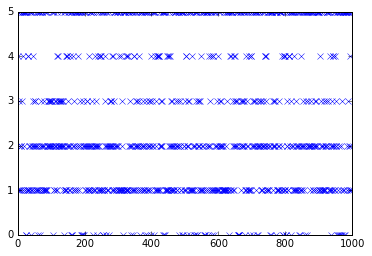

In [154]:
plt.plot(qwe_2,'x')
p_2